In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D, Dropout
from keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

In [3]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [4]:
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)

Shape of training data: 
(25000,)
(25000,)
Shape of test data: 
(25000,)
(25000,)


In [5]:
set(list(y_train))

{0, 1}

In [6]:
# Padding the data samples to a maximum review length in words
max_words =200
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [7]:
X_train.shape

(25000, 200)

In [8]:
# Building the CNN Model
model = Sequential()     
# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
model.add(Embedding(top_words, 64, input_length=max_words))
model.add(Conv1D(64,11, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

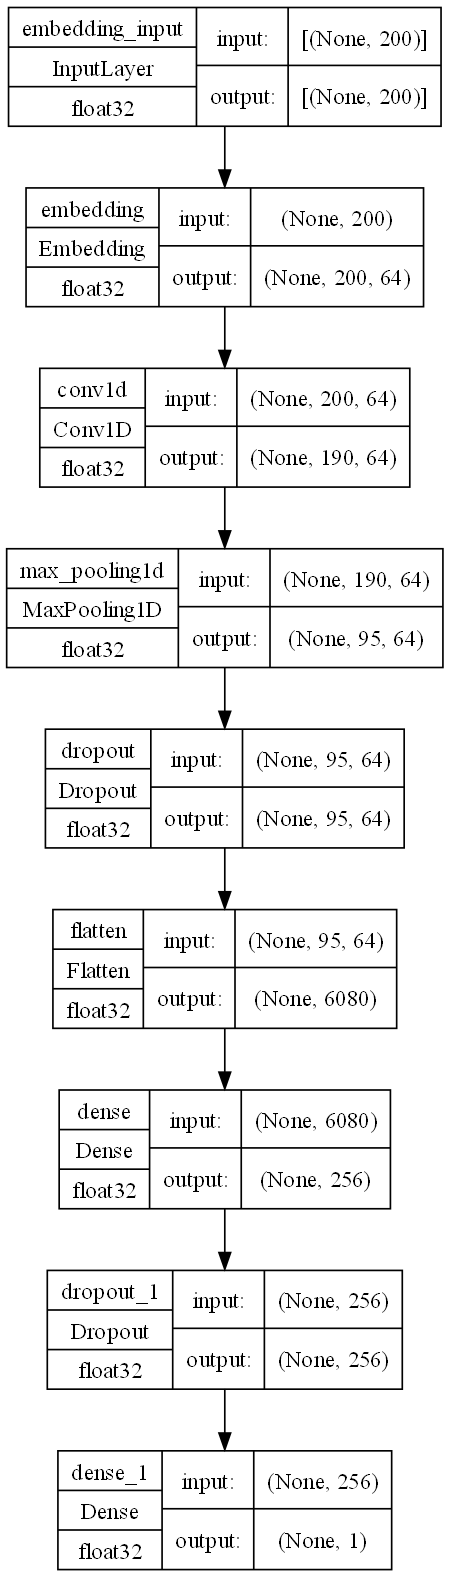

In [23]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           320000    
                                                                 
 conv1d (Conv1D)             (None, 190, 64)           45120     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 95, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 95, 64)            0         
                                                                 
 flatten (Flatten)           (None, 6080)              0         
                                                                 
 dense (Dense)               (None, 256)               1556736   
                                                        

In [10]:
# Fitting the data onto model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)
early_stop=EarlyStopping(monitor='val_loss',patience=2)
hist=model.fit(X_train, y_train, validation_split=.1, epochs=10,callbacks=[reduce_lr,early_stop])

Epoch 1/10
704/704 [==============================] - 32s 45ms/step - loss: 0.4060 - accuracy: 0.7920 - val_loss: 0.2984 - val_accuracy: 0.8724 - lr: 0.0010
Epoch 2/10
704/704 [==============================] - 33s 46ms/step - loss: 0.2260 - accuracy: 0.9113 - val_loss: 0.3313 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 3/10
704/704 [==============================] - 34s 49ms/step - loss: 0.1538 - accuracy: 0.9414 - val_loss: 0.3197 - val_accuracy: 0.8840 - lr: 0.0010


In [11]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,0.405990,0.791956,0.298377,0.8724,0.001
1,0.226038,0.911333,0.331306,0.8700,0.001
2,0.153783,0.941422,0.319714,0.8840,0.001


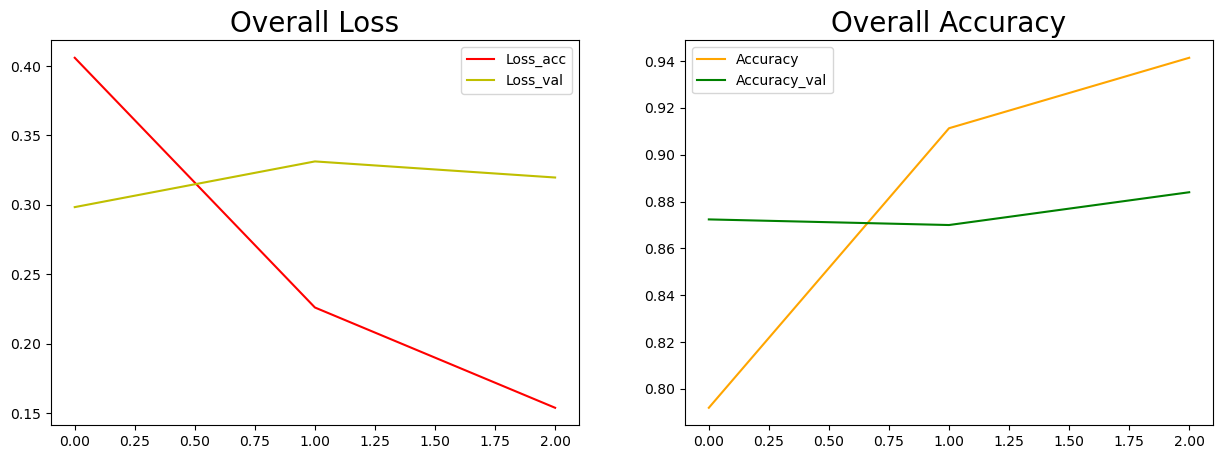

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],c='r',label='Loss_acc')
plt.plot(hist_['val_loss'],c='y',label='Loss_val')
plt.title('Overall Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],c='orange',label='Accuracy')
plt.plot(hist_['val_accuracy'],c='green',label='Accuracy_val')
plt.title('Overall Accuracy',fontsize=20)
plt.legend()

In [13]:
# Getting score metrics from our model
scores = model.evaluate(X_test, y_test)

782/782 [==============================] - 6s 8ms/step - loss: 0.3309 - accuracy: 0.8749


In [14]:
# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.49%


In [16]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

782/782 [==============================] - 5s 7ms/step


array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

array([[10814,  1686],
       [ 1442, 11058]], dtype=int64)

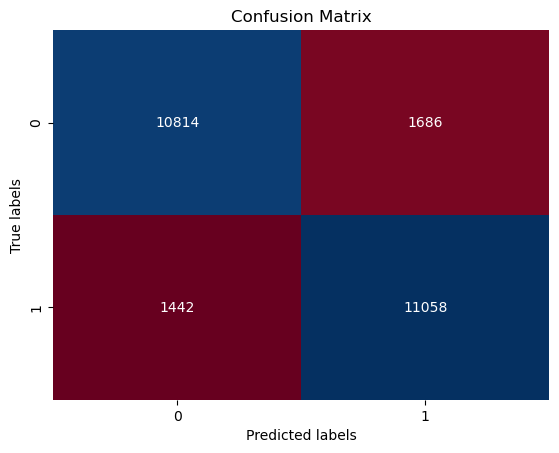

In [17]:
ax= plt.subplot()
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
CM

In [18]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.88      0.87      0.87     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.87     25000
   macro avg       0.88      0.87      0.87     25000
weighted avg       0.88      0.87      0.87     25000



In [19]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.87488


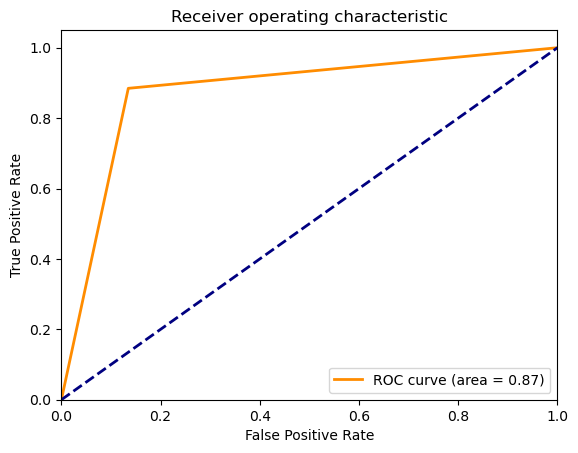

In [20]:
plt.plot(fprValue2,tprValue2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % AUCValue)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()